# Importing the packages

In [1]:
import operator
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

from collections import Counter
from tqdm import tqdm

tqdm.pandas()
%matplotlib inline

## Reading all the datasets.

In [3]:
# Reading the actors dataset.
df_actors = pd.read_csv('dataset/Movie_Actors.csv')

# Reading the rating dataset.
df_ratings = pd.read_csv('dataset/Movie_AdditionalRating.csv')

# Reading the genres dataset.
df_genres = pd.read_csv('dataset/Movie_Genres.csv')

# Reading the movies dataset.
df_movies = pd.read_csv('dataset/Movie_Movies.csv')

# Reading the writers dataset.
df_writers = pd.read_csv('dataset/Movie_Writer.csv')

# 1) Insights from the datasets.

## i) Insights about the Actors Dataset.

In [4]:
# first 5 rows from the actors dataset to see the features of this dataset.
df_actors.head()

,Unnamed: 0,Actors,imdbID
0,0,Cass Barbera,tt2268369
1,2,Charles A. Post,tt0016750
2,3,Samuel Green,tt3405286
3,4,Surin Mendis,tt3816698
4,7,Baby Rube,tt0328410


In [5]:
print('Total Numbers of rows.', len(df_actors), '\n')
print('Information about the dataset.', '\n')
df_actors.info()

Total Numbers of rows. 143869 

Information about the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143869 entries, 0 to 143868
Data columns (total 3 columns):
Unnamed: 0    143869 non-null int64
Actors        143869 non-null object
imdbID        143869 non-null object
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


In [6]:
#finding the actor who appears most frequently in movies.
actors_with_most_movies = dict(sorted(dict(Counter(df_actors.Actors.tolist())).items(), key=operator.itemgetter(1),reverse=True))

In [7]:
# printing the first 10 actors with most number of movies.
for i, (name, times) in enumerate(actors_with_most_movies.items()):
    if i > 10:
        break
    print('The actor {} occured in {} movies.'.format(name, times))

The actor Mel Blanc occured in 88 movies.
The actor Tim Turner occured in 67 movies.
The actor  Mark Davis occured in 48 movies.
The actor  Ron Jeremy occured in 47 movies.
The actor  Peter North occured in 43 movies.
The actor King Edward VII occured in 43 movies.
The actor  Erik Everhard occured in 39 movies.
The actor  James Deen occured in 39 movies.
The actor  Tommy Gunn occured in 33 movies.
The actor Fred Evans occured in 33 movies.
The actor  Sean Michaels occured in 32 movies.


## ii) insights about the Additional Ratings.

In [8]:
# first 5 rows from the ratings dataset to see the features of this dataset.
df_ratings.head()

,Unnamed: 0,Rating,RatingSource,imdbID
0,0,6.9/10,Internet Movie Database,tt1006835
1,1,2.4/10,Internet Movie Database,tt2554714
2,2,6.3/10,Internet Movie Database,tt1090670
3,3,5.5/10,Internet Movie Database,tt1990255
4,4,5.0/10,Internet Movie Database,tt0206367


In [9]:
print('Total Numbers of rows.', len(df_ratings), '\n')
print('Information about the dataset.', '\n')
df_ratings.info()

Total Numbers of rows. 92016 

Information about the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 4 columns):
Unnamed: 0      92016 non-null int64
Rating          92016 non-null object
RatingSource    92016 non-null object
imdbID          92016 non-null object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [10]:
# Total Number of Rating Sources.
print('Total Sources.', len(df_ratings.RatingSource.unique().tolist()), '\n')
print('Rating Sources are. ')
df_ratings.RatingSource.unique().tolist()

Total Sources. 6 

Rating Sources are. 


[' Internet Movie Database',
 ' Rotten Tomatoes',
 ' Metacritic',
 'Internet Movie Database',
 'Rotten Tomatoes',
 'Metacritic']

In [11]:
# Frequency of iterations from each sources.
rating_Sources_counts = dict( sorted(dict(Counter(df_ratings.RatingSource.tolist())).items(), key=operator.itemgetter(1),reverse=True))
rating_Sources_counts

{' Internet Movie Database': 67720,
 ' Rotten Tomatoes': 5758,
 'Internet Movie Database': 5704,
 'Rotten Tomatoes': 5256,
 'Metacritic': 4492,
 ' Metacritic': 3086}

In [12]:
# printing 5 rows of each rating sources.

rating_sources = df_ratings.RatingSource.unique().tolist()
for source in rating_sources:
    print('\n --------- Source {source}--------------- \n'.format(source=source))
    print(df_ratings[df_ratings.RatingSource == source][:2])



 --------- Source  Internet Movie Database--------------- 

   Unnamed: 0   Rating              RatingSource     imdbID
0           0   6.9/10   Internet Movie Database  tt1006835
1           1   2.4/10   Internet Movie Database  tt2554714

 --------- Source  Rotten Tomatoes--------------- 

    Unnamed: 0 Rating      RatingSource     imdbID
5            5    15%   Rotten Tomatoes  tt0206367
14          14    13%   Rotten Tomatoes  tt0098347

 --------- Source  Metacritic--------------- 

    Unnamed: 0   Rating RatingSource     imdbID
6            6   27/100   Metacritic  tt0206367
35          35   45/100   Metacritic  tt2140619

 --------- Source Internet Movie Database--------------- 

       Unnamed: 0  Rating             RatingSource     imdbID
76564           0  8.5/10  Internet Movie Database  tt0172495
76567           3  7.8/10  Internet Movie Database  tt0162222

 --------- Source Rotten Tomatoes--------------- 

       Unnamed: 0 Rating     RatingSource     imdbID
76565     

## iii) Insights about Genres Dataset.

In [13]:
# first 5 rows from the genres dataset to see the features of this dataset.
df_genres.head()

,Unnamed: 0,Genre,imdbID
0,0,Short,tt2268369
1,1,Drama,tt2268369
2,2,Short,tt1560760
3,3,Drama,tt1560760
4,4,Drama,tt0016750


In [14]:
print('Total Numbers of rows.', len(df_genres), '\n')
print('Information about the dataset.', '\n')
df_genres.info()

Total Numbers of rows. 308565 

Information about the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308565 entries, 0 to 308564
Data columns (total 3 columns):
Unnamed: 0    308565 non-null int64
Genre         308565 non-null object
imdbID        308565 non-null object
dtypes: int64(1), object(2)
memory usage: 7.1+ MB


In [15]:
# Summary about the Genre column.
df_genres.Genre.describe()

count     308565
unique        56
top        Short
freq       56867
Name: Genre, dtype: object

## iv) Insights about Writers Dataset.

In [16]:
# first 5 rows from the writers dataset to see the features of this dataset.
df_writers.head()

,Unnamed: 0,Person,Responsibility,imdbID
0,0,Ernest Vajda,story,tt0016750
1,1,Ben F. Wilson,scenario,tt0328410
2,2,Sam-yuk Yoon,screenplay,tt0366512
3,3,Judy Rothman Rofé,screenplay,tt0206367
4,4,E.B. White,book,tt0206367


In [17]:
print('Total Numbers of rows.', len(df_writers), '\n')
print('Information about the dataset.', '\n')
df_writers.info()

Total Numbers of rows. 66164 

Information about the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66164 entries, 0 to 66163
Data columns (total 4 columns):
Unnamed: 0        66164 non-null int64
Person            66164 non-null object
Responsibility    66164 non-null object
imdbID            66164 non-null object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [18]:
# Writer with his/her number of responsibilties in this dataset.
writer_With_responsibilties = dict( sorted(dict(Counter(df_writers.Person.tolist())).items(), key=operator.itemgetter(1),reverse=True))

In [19]:
# First 5 writers with their number of responsibilties.
for i, (writer, responsibilties) in enumerate(writer_With_responsibilties.items()):
    if i > 5:
        break
    print('The writer {writer} have {responsibilties} responsibilties'.format(writer=writer, responsibilties=responsibilties))

The writer William Shakespeare have 114 responsibilties
The writer Bud Fisher have 64 responsibilties
The writer H.M. Walker have 58 responsibilties
The writer Stephen King have 52 responsibilties
The writer Charles Dickens have 50 responsibilties
The writer George H. Plympton have 43 responsibilties


In [20]:
# Types of Responsibilties in the dataset.
print('Total Responsibilties.', len(df_writers.Responsibility.unique().tolist()), '\n')
print('First 10 Responsibilties are. ')
df_writers.Responsibility.unique().tolist()[:10]

Total Responsibilties. 2424 

First 10 Responsibilties are. 


['story',
 'scenario',
 'screenplay',
 'book',
 'original screenplay',
 'based on the stories by',
 'original story',
 'novel',
 'screenwriter',
 'story "A Modern Cinderella"']

## v) Insights about the Movies.

In [21]:

# first 5 rows from the Movies dataset to see the features of this dataset.
df_movies.head()

,Awards,Country,DVD,Director,Language,Plot,Poster,Production,Rated,Released,Runtime,Title,Type,Website,Year,imdbID,imdbRating,imdbVotes
0,NaN,USA,NaN,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,NaN,NaN,NaN,26 Apr 2012,20 min,Baby's Breath,movie,NaN,2012,tt2268369,NaN,NaN
1,NaN,USA,NaN,James Byrne,NaN,The struggle against unfortunate circumstances...,NaN,NaN,NaN,NaN,9 min,Winter Trees,movie,NaN,2008,tt1560760,NaN,NaN
2,NaN,USA,NaN,Dimitri Buchowetzki,NaN,NaN,NaN,NaN,NaN,27 Mar 1926,50 min,The Crown of Lies,movie,NaN,1926,tt0016750,NaN,NaN
3,NaN,USA,NaN,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",NaN,NaN,NaN,27 May 2013,2 min,A Gift,movie,NaN,2013,tt3405286,NaN,NaN
4,NaN,Sri Lanka,NaN,Udara Siriruwan,Sinhalese,NaN,NaN,NaN,NaN,20 Mar 2014,23 min,Journey,movie,NaN,2014,tt3816698,NaN,NaN


In [22]:
print('Total Numbers of rows.', len(df_movies), '\n')
print('Information about the dataset.', '\n')
df_movies.info()

Total Numbers of rows. 178687 

Information about the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178687 entries, 0 to 178686
Data columns (total 18 columns):
Awards        20340 non-null object
Country       165998 non-null object
DVD           15949 non-null object
Director      151353 non-null object
Language      153196 non-null object
Plot          97476 non-null object
Poster        48414 non-null object
Production    16446 non-null object
Rated         23906 non-null object
Released      116974 non-null object
Runtime       119497 non-null object
Title         178686 non-null object
Type          178686 non-null object
Website       6747 non-null object
Year          178686 non-null object
imdbID        178686 non-null object
imdbRating    62073 non-null float64
imdbVotes     62029 non-null object
dtypes: float64(1), object(17)
memory usage: 24.5+ MB


In [23]:
# shape of the dataset, which represents the set of number of rows and columns
df_movies.shape

(178687, 18)

In [25]:
# Checking the percentage of the non-null values in the dataset.
# it will give us the column name and the percentage of non-null values in that particular column.

# to perform analytics we remove those features from the dataset, which have less then 70% of non-null values. 

df_movies.notna().mean().round(4)*100

Awards         11.38
Country        92.90
DVD             8.93
Director       84.70
Language       85.73
Plot           54.55
Poster         27.09
Production      9.20
Rated          13.38
Released       65.46
Runtime        66.88
Title         100.00
Type          100.00
Website         3.78
Year          100.00
imdbID        100.00
imdbRating     34.74
imdbVotes      34.71
dtype: float64

In [26]:
# filtering those features which have less than 70% non-null values.
df_movies = df_movies[['Country', 'Director', 'Language', 'Plot', 'Released', 'Runtime',
                       'Title', 'Type', 'Year', 'imdbRating', 'imdbVotes', 'imdbID']]

In [27]:
# Checking the shape of movie dataset, after removing the features having a big number of null values.
df_movies.shape

(178687, 12)

In [28]:
# Providing the Summary of Country Features.
df_movies.Country.describe()

count     165998
unique      3799
top          USA
freq       93426
Name: Country, dtype: object

In [29]:
# Providing the Summary of Director Features.
df_movies.Director.describe()

count         151353
unique         92410
top       Jim Powers
freq             151
Name: Director, dtype: object

In [30]:
# Providing the Summary of Language Features.
df_movies.Language.describe()

count      153196
unique       2519
top       English
freq       117809
Name: Language, dtype: object

In [31]:
# Providing the Summary of Released Features.
df_movies.Released.describe()

count          116974
unique          25146
top       01 May 2015
freq              173
Name: Released, dtype: object

In [32]:
# Providing the Summary of Year Features.
df_movies.Year.describe()

count     178686
unique       265
top         2015
freq       10699
Name: Year, dtype: int64

In [33]:
# Providing the Summary of Rating Features.
df_movies.imdbRating.describe()

count    62073.000000
mean         6.416236
std          1.360472
min          1.000000
25%          5.600000
50%          6.500000
75%          7.300000
max         10.000000
Name: imdbRating, dtype: float64

# 2) Data Preprocessing

## i) Processing the Year Feature.

In [34]:
# Formatting the Year Feature from the dataset.
df_movies['Year'] = df_movies[df_movies.Year.notna()][:].Year.progress_apply(lambda year: int(year) if type(year) == int else int(year) if type(year) == float else int(year.split('–')[0]))

100%|██████████| 178686/178686 [00:00<00:00, 255287.35it/s]


In [35]:
# Changing the Data type of Year Feature
df_movies = df_movies[df_movies.Year.notna()].astype({'Year': 'int32'})

In [36]:
# Printing all the data types of movies dataset.
df_movies.dtypes

Country        object
Director       object
Language       object
Plot           object
Released       object
Runtime        object
Title          object
Type           object
Year            int32
imdbRating    float64
imdbVotes      object
imdbID         object
dtype: object

## ii) As we can see that there are so many movies, which have no rating at all, we can add more ratings by merging additional ratings from rating dateset using imdbID.

### * but before merging, we have to use same scale for the each rating, because rating dataset don't have same rating process.


In [37]:
# printing 2 rows of each rating sources.

rating_sources = df_ratings.RatingSource.unique().tolist()
for source in rating_sources:
    print('\n --------- Source {source}--------------- \n'.format(source=source))
    print(df_ratings[df_ratings.RatingSource == source][:2])



 --------- Source  Internet Movie Database--------------- 

   Unnamed: 0   Rating              RatingSource     imdbID
0           0   6.9/10   Internet Movie Database  tt1006835
1           1   2.4/10   Internet Movie Database  tt2554714

 --------- Source  Rotten Tomatoes--------------- 

    Unnamed: 0 Rating      RatingSource     imdbID
5            5    15%   Rotten Tomatoes  tt0206367
14          14    13%   Rotten Tomatoes  tt0098347

 --------- Source  Metacritic--------------- 

    Unnamed: 0   Rating RatingSource     imdbID
6            6   27/100   Metacritic  tt0206367
35          35   45/100   Metacritic  tt2140619

 --------- Source Internet Movie Database--------------- 

       Unnamed: 0  Rating             RatingSource     imdbID
76564           0  8.5/10  Internet Movie Database  tt0172495
76567           3  7.8/10  Internet Movie Database  tt0162222

 --------- Source Rotten Tomatoes--------------- 

       Unnamed: 0 Rating     RatingSource     imdbID
76565     

In [38]:
# This function will change the scale of ratings from different sources, into a one type of ratings.
def change_scale(row):
    try:
        # get ratings and strip for spaces.
        rating = row.Rating
        rating = rating.strip()
        # get sources
        sources = row.RatingSource
        # condition for those sources who uses percentage for rating.
        if sources ==' Rotten Tomatoes' or sources == 'Rotten Tomatoes':
            rating = float(rating.strip('%'))/10.0
        # condition for those sources who uses scale of 100 for rating.
        else:
            rating = float(rating.split('/')[0])
            if sources == ' Metacritic' or sources == 'Metacritic':
                rating = rating/10.0
        return rating
    except:
        # for debugging if any error occurs.
        import ipdb; ipdb.set_trace()

In [39]:
# creating a new column into the rating dataset, for new rating. 
df_ratings['New_Ratings'] = df_ratings[df_ratings.Rating.notna()].progress_apply(lambda row: change_scale(row), axis=1)

100%|██████████| 92016/92016 [00:06<00:00, 13433.63it/s]


In [40]:
# printing 2 rows of each rating sources after rescaling.

rating_sources = df_ratings.RatingSource.unique().tolist()
for source in rating_sources:
    print('\n --------- Source {source}--------------- \n'.format(source=source))
    print(df_ratings[df_ratings.RatingSource == source][:2])



 --------- Source  Internet Movie Database--------------- 

   Unnamed: 0   Rating              RatingSource     imdbID  New_Ratings
0           0   6.9/10   Internet Movie Database  tt1006835          6.9
1           1   2.4/10   Internet Movie Database  tt2554714          2.4

 --------- Source  Rotten Tomatoes--------------- 

    Unnamed: 0 Rating      RatingSource     imdbID  New_Ratings
5            5    15%   Rotten Tomatoes  tt0206367          1.5
14          14    13%   Rotten Tomatoes  tt0098347          1.3

 --------- Source  Metacritic--------------- 

    Unnamed: 0   Rating RatingSource     imdbID  New_Ratings
6            6   27/100   Metacritic  tt0206367          2.7
35          35   45/100   Metacritic  tt2140619          4.5

 --------- Source Internet Movie Database--------------- 

       Unnamed: 0  Rating             RatingSource     imdbID  New_Ratings
76564           0  8.5/10  Internet Movie Database  tt0172495          8.5
76567           3  7.8/10  Interne

In [41]:
# removing the old scaling and unnecessary column of unnamed: 0.
df_ratings = df_ratings[['New_Ratings', 'RatingSource', 'imdbID']]

In [42]:
# Printing the First 2
df_ratings.head(2)

,New_Ratings,RatingSource,imdbID
0,6.9,Internet Movie Database,tt1006835
1,2.4,Internet Movie Database,tt2554714


In [43]:
# creating the dataset for ratings with null values.
df_empty_rating_movies = df_movies[df_movies.imdbRating.isna()]
# number of rows in the dataset which contains empty rating.
len(df_empty_rating_movies)

116613

In [46]:
# merging the ratings dataset with empty_rating_movies on behalf of imdbID.
df_merge_movie_ratings = pd.merge(df_empty_rating_movies, df_ratings, on='imdbID')
#checking the shape of the dataset
df_merge_movie_ratings.shape

(379, 14)

In [47]:
df_merge_movie_ratings.columns

Index(['Country', 'Director', 'Language', 'Plot', 'Released', 'Runtime',
       'Title', 'Type', 'Year', 'imdbRating', 'imdbVotes', 'imdbID',
       'New_Ratings', 'RatingSource'],
      dtype='object')

In [48]:
# adding these new created 
def adding_ratings(row):
    df_movies.loc[df_movies.imdbID == row.imdbID, 'imdbRating'] = row.New_Ratings

In [49]:
df_merge_movie_ratings.progress_apply(lambda row: adding_ratings(row), axis=1)

100%|██████████| 379/379 [00:06<00:00, 54.71it/s]


0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
349    None
350    None
351    None
352    None
353    None
354    None
355    None
356    None
357    None
358    None
359    None
360    None
361    None
362    None
363    None
364    None
365    None
366    None
367    None
368    None
369    None
370    None
371    None
372    None
373    None
374    None
375    None
376    None
377    None
378    None
Length: 379, dtype: object

In [50]:
len(df_movies[df_movies.imdbRating.notna()])

62394

In [51]:
# sorting the movies dataset in descending order accoding to the ratings and display only the top 10.
df_movies.sort_values(by=['imdbRating'], ascending=False)[:10]

,Country,Director,Language,Plot,Released,Runtime,Title,Type,Year,imdbRating,imdbVotes,imdbID
152511,Lebanon,Serge Majdalany,Arabic,"As the shelling intensifies, Nadim (an aspirin...",25 Aug 2017,NaN,Take My Hand,movie,2017,10.0,21,tt7441020
115392,India,Alexander Popov,Russian,The small love story removed in GOA in which S...,16 Feb 2014,6 min,The Incredible Indian Adventures of Stepan Men...,movie,2014,10.0,5,tt5440552
158932,Puerto Rico,NaN,Spanish,A married man gets a terrific scare during a d...,02 Oct 2013,2 min,Sweet Dreams,movie,2013,10.0,NaN,tt3585494
114594,USA,"Roberto E. Moscoso, Nelly Barreto",English,A chilling tale of a family encountering evil ...,NaN,10 min,Sweet Dreams,movie,2013,10.0,NaN,tt3907176
2432,Israel,Tal Yaari,Hebrew,NaN,10 Aug 2008,NaN,Sad Story,movie,2008,10.0,9,tt5169454
37962,Australia,John Hopper,English,NaN,NaN,NaN,The Waiting Room,movie,2016,10.0,NaN,tt4023872
52080,USA,Luis S. Alvarez,English,NaN,09 Aug 2017,NaN,Keep Quiet,movie,2017,10.0,NaN,tt7136718
70699,USA,Ezra Bookstein,English,"In 1957, Milton Rogovin was declared The Top R...",26 Jan 2007,NaN,The Rich Have Their Own Photographers,movie,2007,10.0,5,tt0954970
85033,UK,Lawrence Crawford,English,Four young girls from Ayrshire in Scotland dea...,NaN,17 min,The Kids Aren't Alright,movie,2016,10.0,5,tt5806692
18510,USA,Parker Brennon,English,Elise hears an unknown voice in her apartment ...,12 Mar 2017,4 min,Elise's Nightmare,movie,2017,10.0,9,tt6583392


## iii) Merging the Actors dataset into the movies dataset using imdbID

In [81]:
# reading the column names of the actors dataset.
df_actors.columns

Index(['Unnamed: 0', 'Actors', 'imdbID'], dtype='object')

In [82]:
# removing the extra spaces from the begining and starting of the actors name.
df_actors['Actors'] = df_actors[df_actors.Actors.notna()].Actors.progress_apply(lambda actor: actor.strip())

100%|██████████| 143869/143869 [00:00<00:00, 274317.43it/s]


In [83]:
# After deleting the duplicates actors name.
print(len(df_actors))

143869


In [84]:
# merging the movies data set and actors datatset to create the df_movie_analysis dataset.
df_movie_analysis = pd.merge(df_movies, df_actors, on='imdbID', left_index=False)

In [85]:
# print the percentage of non-empty dataset in the analysis dataset.
df_movie_analysis.notna().mean().round(4)*100

Country        93.39
Director       88.77
Language       89.12
Plot           56.30
Released       68.65
Runtime        70.64
Title         100.00
Type          100.00
Year          100.00
imdbRating     40.22
imdbVotes      40.05
imdbID        100.00
Unnamed: 0    100.00
Actors        100.00
dtype: float64

## iv) merging the Genres dataset into the movies dataset using imdbID.

In [86]:
df_genres.columns

Index(['Unnamed: 0', 'Genre', 'imdbID'], dtype='object')

In [88]:
# removing the extra spaces from the genres.
df_genres['Genre'] = df_genres[df_genres.Genre.notna()].Genre.progress_apply(lambda genre: genre.strip())

100%|██████████| 308565/308565 [00:00<00:00, 362370.43it/s]


In [89]:
# adding genres into the movies Data set by merging genre data on the behalf of the imdbID
df_movie_analysis = pd.merge(df_movie_analysis, df_genres, on='imdbID', left_index=False)

In [90]:
df_movie_analysis.columns

Index(['Country', 'Director', 'Language', 'Plot', 'Released', 'Runtime',
       'Title', 'Type', 'Year', 'imdbRating', 'imdbVotes', 'imdbID',
       'Unnamed: 0_x', 'Actors', 'Unnamed: 0_y', 'Genre'],
      dtype='object')

In [91]:
df_movie_analysis = df_movie_analysis[['Country', 'Director', 'Language', 'Plot', 'Released', 'Runtime',
       'Title', 'Type', 'Year', 'imdbRating', 'imdbVotes', 'imdbID', 'Actors', 'Genre']]

In [92]:
len(df_movie_analysis)

250141

In [93]:
df_movie_analysis.head()

,Country,Director,Language,Plot,Released,Runtime,Title,Type,Year,imdbRating,imdbVotes,imdbID,Actors,Genre
0,USA,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,26 Apr 2012,20 min,Baby's Breath,movie,2012,NaN,NaN,tt2268369,Cass Barbera,Short
1,USA,Rose Cummings,English,Rachel constantly hears her baby cry from the ...,26 Apr 2012,20 min,Baby's Breath,movie,2012,NaN,NaN,tt2268369,Cass Barbera,Drama
2,USA,Dimitri Buchowetzki,NaN,NaN,27 Mar 1926,50 min,The Crown of Lies,movie,1926,NaN,NaN,tt0016750,Charles A. Post,Drama
3,USA,Dimitri Buchowetzki,NaN,NaN,27 Mar 1926,50 min,The Crown of Lies,movie,1926,NaN,NaN,tt0016750,Charles A. Post,Romance
4,USA,Julia Hechler,English,"A Gift introduces Samuel Green, Washington Sta...",27 May 2013,2 min,A Gift,movie,2013,NaN,NaN,tt3405286,Samuel Green,Documentary


In [94]:
df_movie_analysis.Genre.nunique()

28

In [95]:
# print the percentage of non-empty dataset in the analysis dataset.
df_movie_analysis.notna().mean().round(4)*100

Country        93.86
Director       91.34
Language       89.87
Plot           65.24
Released       69.22
Runtime        75.88
Title         100.00
Type          100.00
Year          100.00
imdbRating     41.88
imdbVotes      41.67
imdbID        100.00
Actors        100.00
Genre         100.00
dtype: float64

## v) Merging the writers dataset into the movies dataset using imdbID 

In [96]:
# Reading the first two rows of the dataset to show the features of this dataset.
df_writers.head(2)

,Unnamed: 0,Person,Responsibility,imdbID
0,0,Ernest Vajda,story,tt0016750
1,1,Ben F. Wilson,scenario,tt0328410


In [97]:
# removing the extra spaces from the Person Feature of the writers dataset.
df_writers['Person'] = df_writers[df_writers.Person.notna()].Person.progress_apply(lambda person: person.strip())

100%|██████████| 66164/66164 [00:00<00:00, 238273.52it/s]


In [98]:
# printing the unique writers in the writers dataset.
df_writers.Person.nunique()

38532

In [99]:
# merging the movie_analysis dataset and the writers dataset to add new data into the movie analysis dataset.
df_movie_analysis = pd.merge(df_movie_analysis, df_writers, on='imdbID', how='inner', left_index=False)

In [100]:
# filtering the features to be used in the analysis dataset.
df_movie_analysis = df_movie_analysis[['Country', 'Director', 'Language', 'Plot', 'Released', 'Runtime',
       'Title', 'Type', 'Year', 'imdbRating', 'imdbVotes', 'imdbID', 'Actors', 'Genre', 'Person', 'Responsibility']]

In [102]:
# printing the percentage completeness of each feature of movies dataset before processing.
df_movies.notna().mean().round(4)*100

Country        92.90
Director       84.70
Language       85.73
Plot           54.55
Released       65.46
Runtime        66.88
Title         100.00
Type          100.00
Year          100.00
imdbRating     34.92
imdbVotes      34.71
imdbID        100.00
dtype: float64

In [103]:
# printing the percentage completeness of each feature of movies dataset after processing.
df_movie_analysis.notna().mean().round(4)*100

Country            99.72
Director           98.32
Language           96.45
Plot               81.72
Released           87.06
Runtime            88.38
Title             100.00
Type              100.00
Year              100.00
imdbRating         74.60
imdbVotes          74.54
imdbID            100.00
Actors            100.00
Genre             100.00
Person            100.00
Responsibility    100.00
dtype: float64

In [104]:
# sample size of the movies_analysis dataset.
len(df_movie_analysis)

127347

# Analysis

## In this analysis portion we can run multiple analysis. e.g.

### 1. Analysis On Directors.

#### i. Maximum number of movies directed by director(Top 10).

#### ii. Maximum number of movies directed by a director in a genre(Top 10).

#### iii. The year in which the director had directed the most movies.


### 2. Analysis On Actors.

#### i. Maximum number of movies performed by an Actor(Top 10).

#### ii. Maximum number of movies performent by an Actor in a genre(Top 10).

### 3. Analysis On Writer.

#### i. Maximum number of movies written by writer(Top 10).

#### ii. Maximum number of movies written by writer in a genre(Top 10).

### 4. Aanalysis On Rating.

#### i.  Most rating Genre.

### 5. Genre.

#### i.  Maximum Number of movies in Genre.
#### ii.  Maximum Number of movies in an year in a certain Genre.
#### iii.  Maximum Number of movies of a language in Genre.

### 1) Analysis on Director

In [135]:
# Checking the Top 10 Director with most number of movies
directors_with_movies_counts = dict( sorted(dict(Counter(df_movie_analysis.Director.tolist())).items(), key=operator.itemgetter(1),reverse=True))
for i, (director, num_movies) in enumerate(directors_with_movies_counts.items()):
    if i > 11: break
    if i > 0: print('{director} had directed {movies} movies.'.format(director=director, movies=num_movies))

Jeff Tremaine had directed 198 movies.
William Beaudine had directed 187 movies.
Ron Clements, John Musker had directed 162 movies.
Sam Newfield had directed 156 movies.
Richard Thorpe had directed 156 movies.
Steven Spielberg had directed 154 movies.
Raoul Walsh had directed 150 movies.
Gary Trousdale, Kirk Wise had directed 135 movies.
Michael Curtiz had directed 134 movies.
Lew Landers had directed 133 movies.
Lloyd Bacon had directed 129 movies.


In [107]:
# Checking the Directors who directed most number of movies in a specific genre sorted by Genre Name.

movies_director_group = df_movie_analysis.groupby(['Director', 'Genre'])
top_director = movies_director_group['imdbID'].count().reset_index()
top_director.columns = ['Director', 'Genre', 'Number_of_Movies']
top_director.sort_values(by=['Number_of_Movies'], ascending=False, inplace=True)
top_director[:10].sort_values(by=['Genre'], ascending=True).head(10)

,Director,Genre,Number_of_Movies
19492,Jeff Tremaine,Action,66
36387,"Ron Clements, John Musker",Adventure,54
36388,"Ron Clements, John Musker",Animation,54
13775,"Gary Trousdale, Kirk Wise",Animation,45
43746,William Beaudine,Comedy,79
19493,Jeff Tremaine,Comedy,66
36389,"Ron Clements, John Musker",Comedy,46
44093,William Watson,Comedy,44
19494,Jeff Tremaine,Documentary,66
641,Al Christie,Short,44


In [108]:
# Creating a list of top 10 Directors.

top_directors = []
for i, (director, counts) in enumerate(directors_with_movies_counts.items()):
    if i > 11: break
    top_directors.append(director)
top_directors = top_directors[1:]
print(top_directors)

['Jeff Tremaine', 'William Beaudine', 'Ron Clements, John Musker', 'Sam Newfield', 'Richard Thorpe', 'Steven Spielberg', 'Raoul Walsh', 'Gary Trousdale, Kirk Wise', 'Michael Curtiz', 'Lew Landers', 'Lloyd Bacon']


In [109]:
# Creating a column for keep the status of top 10 directors.

df_movie_analysis['Keep_Director'] = df_movie_analysis[df_movie_analysis.Director.notna()].Director.progress_apply(lambda director: True if director in top_directors else False)

100%|██████████| 125211/125211 [00:00<00:00, 256335.00it/s]


In [110]:
# create a new dataframe of top 10 directors.

df_directors = df_movie_analysis[df_movie_analysis.Keep_Director == True]

In [111]:
# length of the directors.
len(df_directors)

1694

In [112]:
# Filtering the director from the year 1980.

df_directors = df_directors[(df_directors.Year >= 1980)]

In [131]:
# creating the group by filter from the feature of Year and Director.
movies_director_with_year_group = df_directors.groupby(['Year', 'Director']) 

In [132]:
# showing the mean of the rating of the director of showing the average rating of the movie directed by a director in the year.

movies_director_with_year_group['imdbRating'].mean().reset_index()

,Year,Director,imdbRating
0,1987,Steven Spielberg,7.80
1,1991,"Gary Trousdale, Kirk Wise",8.00
2,1991,Steven Spielberg,6.70
3,1992,"Ron Clements, John Musker",8.00
4,1993,Steven Spielberg,8.42
5,1996,"Gary Trousdale, Kirk Wise",6.90
6,1997,"Ron Clements, John Musker",7.30
7,1997,Steven Spielberg,6.50
8,2001,"Gary Trousdale, Kirk Wise",6.80
9,2001,Steven Spielberg,7.10


In [133]:
# showing the number of movies directed by the Director in one specific year.
movies_director_with_year_group['imdbID'].count().reset_index()#.sort_values(by=['imdbID'], ascending=False)

,Year,Director,imdbID
0,1987,Steven Spielberg,6
1,1991,"Gary Trousdale, Kirk Wise",33
2,1991,Steven Spielberg,18
3,1992,"Ron Clements, John Musker",60
4,1993,Steven Spielberg,15
5,1996,"Gary Trousdale, Kirk Wise",78
6,1997,"Ron Clements, John Musker",54
7,1997,Steven Spielberg,6
8,2001,"Gary Trousdale, Kirk Wise",24
9,2001,Steven Spielberg,9


### 2) Movie Analysis on Genres.

In [144]:
# creating the Dataframe containing the Genres and number of movies in that Genres.

movies_genres_group = df_movie_analysis.groupby('Genre')
top_genres = movies_genres_group['imdbID'].count().reset_index()
top_genres.columns = ['Genre', 'Number_of_Movies']
top_genres.sort_values(by=['Number_of_Movies'], ascending=False, inplace=True)
top_genres.head(5)

,Genre,Number_of_Movies
8,Drama,27065
5,Comedy,19508
22,Short,12417
0,Action,8072
2,Adventure,7521


In [154]:
# creating the list of top 5 genres.
top_five_genres = top_genres.Genre.unique().tolist()[:5]

In [151]:
# Creating a column for keep the status of top 5 Genres.
df_movie_analysis['Keep_Genre'] = df_movie_analysis[df_movie_analysis.Genre.notna()].Genre.progress_apply(lambda genre: True if genre in top_five_genres else False)

100%|██████████| 127347/127347 [00:00<00:00, 236993.86it/s]


In [153]:
# creating a dataset from top 5 genres.
df_genres_analysis = df_movie_analysis[df_movie_analysis.Keep_Genre == True]

In [161]:
# Filtering the dataset according to the date.
df_genres_analysis = df_genres_analysis[df_genres_analysis.Year >= 2000]
movies_genres_with_year_group = df_genres_analysis.groupby(['Year', 'Genre'])

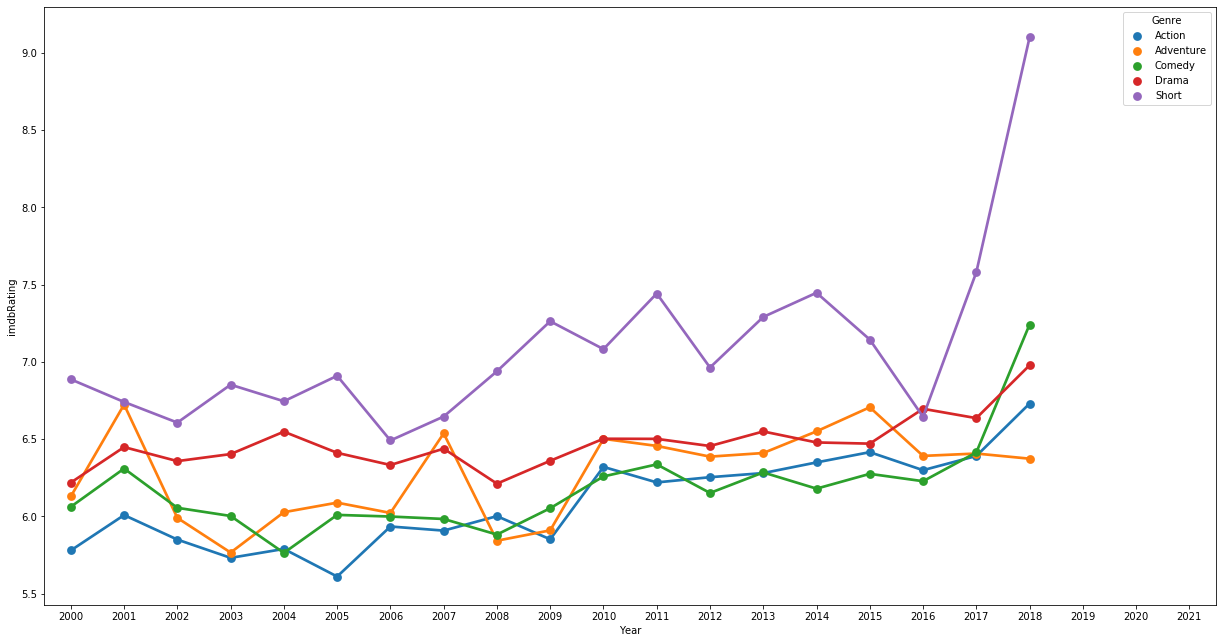

In [162]:
# Movies plot according to the Genre and their rating according to a specific year.

fig, ax = plt.subplots()

fig.set_size_inches(21, 11)
sns.pointplot(x = 'Year', y = 'imdbRating', data = movies_genres_with_year_group['imdbRating'].mean().reset_index(), hue = 'Genre', ax = ax)

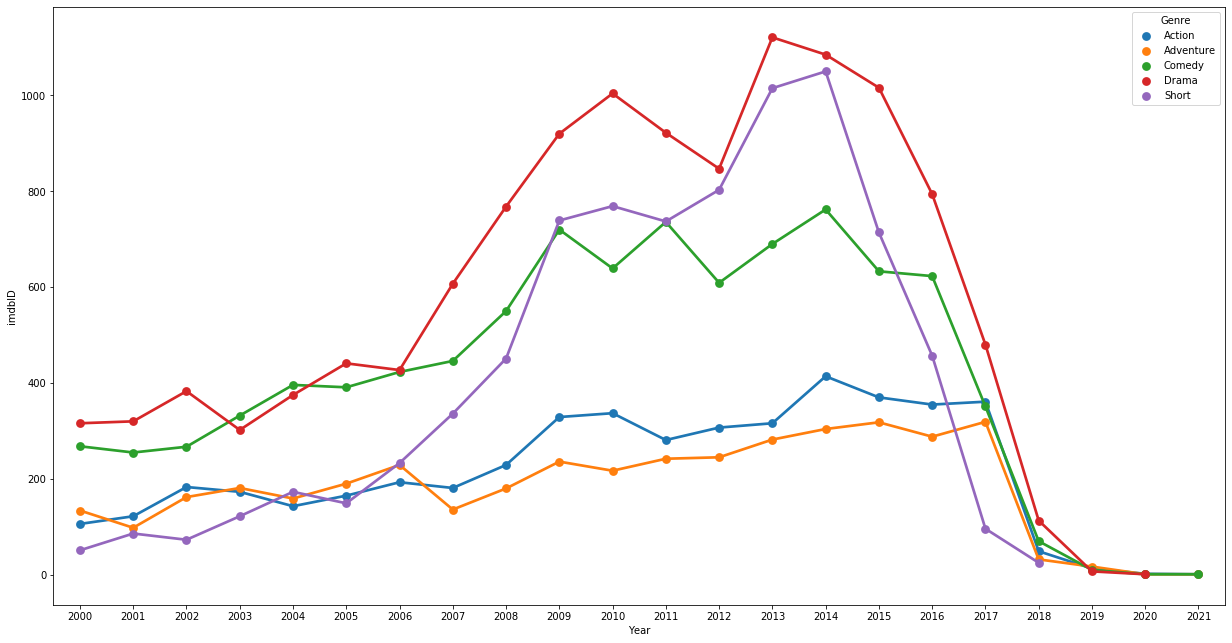

In [163]:
# Movies plot according to the Genre and number of movies genereated in a specific year.

fig, ax = plt.subplots()

fig.set_size_inches(21, 11)
sns.pointplot(x = 'Year', y = 'imdbID', data = movies_genres_with_year_group['imdbID'].count().reset_index(), hue = 'Genre', ax = ax)

### 3) Actors Analysis

In [143]:
# Checking the Top 10 actors with most number of movies
actors_with_movies_counts = dict( sorted(dict(Counter(df_movie_analysis.Actors.tolist())).items(), key=operator.itemgetter(1),reverse=True))
for i, (actors, num_movies) in enumerate(actors_with_movies_counts.items()):
    if i > 10: break
    print('{actors} had acted in {movies} movies.'.format(actors=actors, movies=num_movies))

Mel Blanc had acted in 269 movies.
Jim Cummings had acted in 202 movies.
Tim Turner had acted in 142 movies.
Chris Pontius had acted in 126 movies.
June Foray had acted in 123 movies.
Steve Buscemi had acted in 99 movies.
Grey DeLisle had acted in 84 movies.
Billy Connolly had acted in 84 movies.
Tony Goldwyn had acted in 81 movies.
Manoëlle Gaillard had acted in 75 movies.
Rick Moranis had acted in 75 movies.


In [156]:
actors_group = df_movie_analysis.groupby(['Actors', 'Genre'])
actors_favorite_Genre = actors_group['imdbID'].count().reset_index()
actors_favorite_Genre.columns = ['Actors', 'Genre', 'Number_of_Movies']
actors_favorite_Genre.sort_values(by=['Number_of_Movies'], ascending=False, inplace=True)
actors_favorite_Genre[:10].sort_values(by=['Genre'], ascending=False).head(10)

,Actors,Genre,Number_of_Movies
36131,Mel Blanc,Short,79
50863,Tim Turner,Short,71
37951,Momiji Yamamura,Mystery,48
36129,Mel Blanc,Family,71
25191,Jim Cummings,Drama,59
50862,Tim Turner,Documentary,71
8959,Chris Pontius,Comedy,42
36126,Mel Blanc,Animation,90
25189,Jim Cummings,Animation,68
8958,Chris Pontius,Action,42


### 4) Writer Analysis

In [138]:
# Checking the Top 10 Writer with most number of movies
writer_with_movies_counts = dict( sorted(dict(Counter(df_movie_analysis.Person.tolist())).items(), key=operator.itemgetter(1),reverse=True))
for i, (writer, num_movies) in enumerate(writer_with_movies_counts.items()):
    if i > 10: break
    print('{writer} had written {movies} movies.'.format(writer=writer, movies=num_movies))

William Shakespeare had written 193 movies.
H.M. Walker had written 130 movies.
Stephen King had written 121 movies.
Michael Maltese had written 96 movies.
Charles Dickens had written 91 movies.
Edgar Allan Poe had written 84 movies.
George H. Plympton had written 82 movies.
Jack Kirby had written 82 movies.
Jules Verne had written 79 movies.
Warren Foster had written 78 movies.
Hans Christian Andersen had written 75 movies.


In [139]:
movies_writer_group = df_movie_analysis.groupby(['Person', 'Genre'])
witer_favorite_Genre = movies_writer_group['imdbID'].count().reset_index()
witer_favorite_Genre.columns = ['Writer', 'Genre', 'Number_of_Movies']
witer_favorite_Genre.sort_values(by=['Number_of_Movies'], ascending=False, inplace=True)
witer_favorite_Genre[:10].sort_values(by=['Genre'], ascending=False).head(10)

,Writer,Genre,Number_of_Movies
30726,H.M. Walker,Short,53
77994,Stephen King,Horror,33
86478,William Shakespeare,Drama,52
12205,Charles Dickens,Drama,32
10769,C. Gardner Sullivan,Drama,29
30723,H.M. Walker,Comedy,57
86475,William Shakespeare,Comedy,45
27819,George Ade,Comedy,33
58280,Michael Maltese,Animation,32
35434,Jack Kirby,Action,28


## Creating the Connection to the sqlite database.

In [88]:
# Creating the connection to the database.
conn = sqlite3.connect('database/movies_database.db')

In [89]:
# creating the cursor for executing the queries.
cursor = conn.cursor()

In [90]:
# closing the cursor connection.
cursor.close()